<a href="https://colab.research.google.com/github/ucfilho/Raianars_paper_one_revisited/blob/main/After_asked_reviews_one_2022/POP/C_Frannk_pop2_F20_mut3%3D0_75%3Bcrossp3%3D0_75%3Bmut4%3D0_25%3Bcrossp4%3D0_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import Rand_DE
import de_bounds_best
CR_interval = [0.2,1.0]
F_interval = [0.2,1.0]
mut_best  =0.5 ; crossp_best =0.5
pop_split = [400,100,80]
run_split = [100,200,500]

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 397, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 397 (delta 46), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (397/397), 335.23 KiB | 4.47 MiB/s, done.
Resolving deltas: 100% (227/227), done.
/content/optim_raianars_Insight/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/Raianars_paper_One/ANN_read_matrix/optim_raianars_Insight


In [42]:
'''
# What is running in this code...     
      X2,BEST2,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut2, crossp2,NPAR2, its,fobj,X2)
      X3,BEST3,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut3, crossp3,NPAR3, its,fobj,X3)
      X4,BEST4,FOBEST,XY,BEST_XY=de_bounds_best.de(bounds, mut_best ,crossp_best,NPAR4, its,fobj,X4)
      X1,BEST1,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR1,its,Fun,X1,SOMA,TOTAL)
      
      frannk/de= 1/4

'''

'\n# What is running in this code...     \n      X2,BEST2,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut2, crossp2,NPAR2, its,fobj,X2)\n      X3,BEST3,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut3, crossp3,NPAR3, its,fobj,X3)\n      X4,BEST4,FOBEST,XY,BEST_XY=de_bounds_best.de(bounds, mut_best ,crossp_best,NPAR4, its,fobj,X4)\n      X1,BEST1,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR1,its,Fun,X1,SOMA,TOTAL)\n      \n      frannk/de= 1/4\n\n'

In [43]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz
import Go2Ann
from pandas import read_csv

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 397, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 397 (delta 46), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (397/397), 335.23 KiB | 4.19 MiB/s, done.
Resolving deltas: 100% (227/227), done.
/content/optim_raianars_Insight/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/Raianars_paper_One/ANN_read_matrix/optim_raianars_Insight/optim_raianars_Insight


In [44]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

Cloning into 'Raianars_paper_One'...
remote: Enumerating objects: 272, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 272 (delta 82), reused 143 (delta 82), pack-reused 129
Receiving objects: 100% (272/272), 659.28 KiB | 6.05 MiB/s, done.
Resolving deltas: 100% (154/154), done.
/content/optim_raianars_Insight/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/Raianars_paper_One/ANN_read_matrix/optim_raianars_Insight/optim_raianars_Insight/Raianars_paper_One


In [45]:
#import Go2Ann
#import de_soma_Insight
#import de_bounds_matriz
#import Function
import Go2MinMax
from AvaliaX import AvaliaX
#from Function import FUN
#from Function import Function.FUN
#from Function import Function.Fun
#from Function import Function
from GeraIndices import GeraIndices
import numpy as np
import time
import matplotlib.pyplot as plt
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

############################### DADOS DE ENTRADA 
RUNS=50 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=1000 #10 # PONTOS quantas vezes vai alteral NPAR 
NPAR=100
mut=0.5
crossp=0.5

Fi=mut;CRi=crossp;# para impressão
fator = 1.0/4.0; 
mut2=0.5;crossp2=0.5;mut3=0.75;crossp3=0.75;mut4=0.25;crossp4=0.25;


In [46]:
def load_shift_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values.reshape((-1))

def load_matrix_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values

In [47]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 397, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 397 (delta 46), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (397/397), 335.23 KiB | 4.14 MiB/s, done.
Resolving deltas: 100% (227/227), done.
/content/optim_raianars_Insight/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/Raianars_paper_One/ANN_read_matrix/optim_raianars_Insight/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight


In [48]:
#!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
#%cd Raianars_paper_One

!git clone https://github.com/ucfilho/Raianars_Routines #clonar do Github
%cd Raianars_Routines

Cloning into 'Raianars_Routines'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 77 (delta 23), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (77/77), done.
/content/optim_raianars_Insight/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/Raianars_paper_One/ANN_read_matrix/optim_raianars_Insight/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines


In [49]:
!git clone https://github.com/ucfilho/functions_cec2014_data
%cd functions_cec2014_data
import F1_to_F27_cec2014_zero_to_hero
import cec2014_names
import cec2014_shift_rotate

Cloning into 'functions_cec2014_data'...
remote: Enumerating objects: 300, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 300 (delta 2), reused 0 (delta 0), pack-reused 294
Receiving objects: 100% (300/300), 465.31 KiB | 3.21 MiB/s, done.
Resolving deltas: 100% (181/181), done.
/content/optim_raianars_Insight/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/Raianars_paper_One/ANN_read_matrix/optim_raianars_Insight/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data


In [50]:
function_select = 'F20'

problem_size = 30 # possibles 2, 10, 20, 30, 50, 100

In [51]:
dim = problem_size 

In [52]:
if function_select == 'F28':
  hybrid_choice = 'F15'


In [53]:
!pip install --upgrade --no-cache-dir gdown

In [54]:
# !gdown --id 1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz
# https://drive.google.com/file/d/1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz/view?usp=sharing
!gdown --id 1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz
To: /content/optim_raianars_Insight/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/Raianars_paper_One/ANN_read_matrix/optim_raianars_Insight/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/cec2014.zip
100% 36.1M/36.1M [00:00<00:00, 213MB/s]


In [55]:
import zipfile
file_name = zipfile.ZipFile('cec2014.zip', 'r')
file_name.extractall()

In [56]:

Function_CEC2014 =function_select + "_" + cec2014_names.NamesFunctions()[function_select]+"_D_"+str(problem_size)

f_matrix = "M_"+function_select[1:]+"_D"+str(problem_size) + ".txt"
shift_data_file="shift_data_"+function_select[1:]+".txt"
shift_data = load_shift_data__(shift_data_file)[:problem_size]
matrix = load_matrix_data__(f_matrix)
f_shuffle = "shuffle_data_"+function_select[1:]+"_D"+str(problem_size) + ".txt"
shuffle = (load_shift_data__(f_shuffle)[:problem_size] - np.ones(problem_size)).astype(int)

f12_hgbat__ = F1_to_F27_cec2014_zero_to_hero.f12_hgbat__
f3_discus__ = F1_to_F27_cec2014_zero_to_hero.f3_discus__
f13_expanded_griewank__ = F1_to_F27_cec2014_zero_to_hero.f13_expanded_griewank__
f8_rastrigin__ = F1_to_F27_cec2014_zero_to_hero.f8_rastrigin__

f1_elliptic__ = F1_to_F27_cec2014_zero_to_hero.f1_elliptic__


def F20(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
    problem_size = len(solution)
    p = np.array([0.2, 0.2, 0.3, 0.3])
    n1 = int(np.ceil(p[0] * problem_size))
    n2 = int(np.ceil(p[1] * problem_size))
    n3 = int(np.ceil(p[2] * problem_size))

    idx1 = shuffle[:n1]
    idx2 = shuffle[n1:(n1 + n2)]
    idx3 = shuffle[(n1 + n2):(n1 + n2 + n3)]
    idx4 = shuffle[n1 + n2 + n3:]
    mz = np.dot(solution - shift_data, matrix)
    return f12_hgbat__(mz[idx1]) + f3_discus__(mz[idx2]) + f13_expanded_griewank__(mz[idx3]) + f8_rastrigin__(mz[idx4])# + bias

In [57]:
def load_shift_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values.reshape((-1))

def load_matrix_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values

In [58]:
if function_select == 'F28':
  Function = F28
if function_select == 'F25':
  Function = F25
if function_select == 'F22':
  Function = F22
if function_select == 'F20':
  Function = F20
  
fobj=Function
Fun = Function

In [59]:
SUPPORT_DIMENSION = [2, 10, 20, 30, 50, 100]
SUPPORT_DIMENSION_2 = [10, 20, 30, 50, 100]

#def Fun(solution,shift_data=shift_data_a, matrix=matrix_a, shuffle):#, bias=F_bias):
def CEC2014(solution, shift_data ,  matrix, shuffle):#, bias=F_bias):
  if(type_fun == 'shift_rotate'):
    z = Shift_Rotate(solution , shift_data , matrix,shuffle)
    result = Function(z) + F_bias
  elif(type_fun =='hybrid'): # F17 to F22
    z = Shift_Rotate(solution , shift_data , matrix,shuffle)
    result = z + F_bias
 
  return result

In [60]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

Cloning into 'Raianars_paper_One'...
remote: Enumerating objects: 272, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 272 (delta 82), reused 143 (delta 82), pack-reused 129
Receiving objects: 100% (272/272), 659.28 KiB | 6.66 MiB/s, done.
Resolving deltas: 100% (154/154), done.
/content/optim_raianars_Insight/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/Raianars_paper_One/ANN_read_matrix/optim_raianars_Insight/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/Raianars_paper_One


In [61]:
MAX=np.repeat(100,dim)
MIN=np.repeat(-100,dim)

bounds=[]
for k in range(len(MAX)):
  bounds.append((MIN[k],MAX[k]))

In [62]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

Cloning into 'ANN_read_matrix'...
remote: Enumerating objects: 20, done.
remote: Total 20 (delta 0), reused 0 (delta 0), pack-reused 20
Unpacking objects: 100% (20/20), done.
/content/optim_raianars_Insight/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/Raianars_paper_One/ANN_read_matrix/optim_raianars_Insight/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/Raianars_paper_One/ANN_read_matrix


In [63]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [64]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [65]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [66]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [67]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [68]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [69]:
##################################### 

TOTAL=10*dim*its*ITE
TOTAL=int(TOTAL/2)   # CONFERIR SE ESTE EH O MELHOR LUGAR

#dimensions=len(MAX)
dimensions=dim
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO


PAR=dim


MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1

NPAR = pop_split[0]
NPAR1=int(fator*NPAR);
NPAR2=int((NPAR-NPAR1)/3);
NPAR3=int((NPAR-NPAR1)/3);
NPAR4=int((NPAR-NPAR1)/3);
NPAR1 = NPAR-3*NPAR2

print('frac=',fator);
print('Npar1=',NPAR1);
print('Npar2=',NPAR2);
print('Npar3=',NPAR3);
print('Npar4=',NPAR4);
print('Npar=',NPAR)

cols=dim

X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
for i in range(NPAR1):
  for j in range(cols):
    r=np.random.random()
    X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
for i in range(NPAR2):
  for j in range(cols):
    r=np.random.random()
    X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

X3=np.zeros((NPAR3,cols)) # X1 is Frannk population
for i in range(NPAR3):
  for j in range(cols):
    r=np.random.random()
    X3[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X4=np.zeros((NPAR4,cols)) # X2 is population DE (default DE)
for i in range(NPAR4):
  for j in range(cols):
    r=np.random.random()
    X4[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
 ############################################################
  #bounds=[(5*dim, 15*dim)] * PONTOS # ITE
  #bounds=[(3*dim, 12*dim)] * PONTOS # ITE
  #bounds=[(4*dim, 16*dim)] * PONTOS
  
  # nao pode ser assim pq o bounds vale p o DE nao dos parametros
  #p=int(TOTAL/its/ITE) 
  #bounds=[(p, p)] * PONTOS


frac= 0.25
Npar1= 100
Npar2= 100
Npar3= 100
Npar4= 100
Npar= 400


In [70]:
NPAR2,X2.shape,k

(100, (100, 30), 29)

In [71]:

start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]
for iii in range(RUNS):
    MAT=[] 
    mut=Fi
    crossp=CRi
    SOMA=0
    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(PAR)

    NPAR = pop_split[0]
    NPAR1=int(fator*NPAR);
    NPAR2=int((NPAR-NPAR1)/3);
    NPAR3=int((NPAR-NPAR1)/3);
    NPAR4=int((NPAR-NPAR1)/3);
    NPAR1 = NPAR-3*NPAR2

    X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
    for i in range(NPAR1):
      for j in range(cols):
        r=np.random.random()
        X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
        
    X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
    for i in range(NPAR2):
      for j in range(cols):
        r=np.random.random()
        X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

    X3=np.zeros((NPAR3,cols)) # X2 is population DE (default DE)
    for i in range(NPAR3):
      for j in range(cols):
        r=np.random.random()
        X3[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

    X4=np.zeros((NPAR4,cols)) # X2 is population DE (default DE)
    for i in range(NPAR4):
      for j in range(cols):
        r=np.random.random()
        X4[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
    DIo=1e99
  
    CRo=crossp;Fo=mut;
    Fitness = np.asarray([Fun(ind, shift_data , matrix, shuffle) for ind in X1])
    XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X1,Fitness)
    nrow,ncol=X1.shape

    QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
    MAT_INDo[0,5]=nrow  # VALOR NP
    MAT_INDo[0,6]=Fo    # VALOR Fo   
    MAT_INDo[0,7]=CRo   # VALOR CRo

    Fuma = f1_elliptic__  # Fuma era Fun
  
    MAT_INDo=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fuma)
  
    DIo=np.copy(MAT_INDo[0,0])
    MAT_INDo[0,15]=Fo    # VALOR Fo   
    MAT_INDo[0,16]=CRo   # VALOR CRo
    #ind_crossp=ITE-1
    

    
    for k in range(ITE):



      X2,BEST2,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut2, crossp2,NPAR2, its,fobj,X2)
      X3,BEST3,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut3, crossp3,NPAR3, its,fobj,X3)
      #X3,BEST3,FOBEST,XY,BEST_XY=Rand_DE.de(bounds,  F_interval , CR_interval, NPAR3, its,fobj,X3)
      X4,BEST4,FOBEST,XY,BEST_XY=de_bounds_best.de(bounds, mut_best ,crossp_best,NPAR4, its,fobj,X4)
      
      X1,BEST1,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR1,its,Fun,X1,SOMA,TOTAL)

      MAT_IND=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                          syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                          X_min_CR,Fc,fields,Fun)
    
      BESTo=np.copy(BEST1);FOBESTo=np.copy(FOBEST);
      MAT.append(MAT_IND.ravel())
    
      MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
      MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
      mut=MAT_IND[0,15]
      crossp=MAT_IND[0,16]
      X1[0,:] = BEST2;X1[1,:] = BEST3; X1[2,:] = BEST4;X1[NPAR1-1,:] = BEST1;
      X2[0,:] = BEST1;X2[1,:] = BEST3;X2[2,:] = BEST4;X2[NPAR2-1,:] = BEST2;
      X3[0,:] = BEST1;X3[1,:] = BEST2;X3[2,:] = BEST4;X3[NPAR3-1,:] = BEST3;
      X4[0,:] = BEST1;X4[1,:] = BEST2;X4[2,:] = BEST3;X4[NPAR4-1,:] = BEST4;

      # run_split = [200,400,400]
      if(k <= run_split[0]):
        NPAR = pop_split[0]
        NPAR1=int(fator*NPAR);
        NPAR2=int((NPAR-NPAR1)/3);
        NPAR3=int((NPAR-NPAR1)/3);
        NPAR4=int((NPAR-NPAR1)/3);
        NPAR1 = NPAR-3*NPAR2
        X1 = X1[:NPAR1,:]; X2 = X2[:NPAR2,:]; X3 = X3[:NPAR3,:]; X4 = X4[:NPAR4,:];
      elif(k<= run_split[1]):
        NPAR = pop_split[1]
        NPAR1=int(fator*NPAR);
        NPAR2=int((NPAR-NPAR1)/3);
        NPAR3=int((NPAR-NPAR1)/3);
        NPAR4=int((NPAR-NPAR1)/3);
        NPAR1 = NPAR-3*NPAR2
        X1 = X1[:NPAR1,:]; X2 = X2[:NPAR2,:]; X3 = X3[:NPAR3,:]; X4 = X4[:NPAR4,:];
      elif(k<= run_split[2]):
        NPAR = pop_split[2]
        NPAR1=int(fator*NPAR);
        NPAR2=int((NPAR-NPAR1)/3);
        NPAR3=int((NPAR-NPAR1)/3);
        NPAR4=int((NPAR-NPAR1)/3);
        NPAR1 = NPAR-3*NPAR2
        X1 = X1[:NPAR1,:]; X2 = X2[:NPAR2,:]; X3 = X3[:NPAR3,:]; X4 = X4[:NPAR4,:];



    print('k=',iii,'time=',(time.time()-start_time)/60, 'FO=',FOBEST)  
    BEST_AGENTS.append(BEST_XY)
    MAT_stat.append(MAT)
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

k= 0 time= 2.214737371603648 FO= 5942.5022387615745
k= 1 time= 3.967470419406891 FO= 11691.139051564021
k= 2 time= 5.696948671340943 FO= 21377.274928232942
k= 3 time= 7.428465656439463 FO= 1743.9400088280136
k= 4 time= 9.168782703081767 FO= 15347.390883339318
k= 5 time= 10.896406702200572 FO= 6085.773498538279
k= 6 time= 12.636369184652965 FO= 12174.568428185208
k= 7 time= 14.375006413459777 FO= 9796.705999541664
k= 8 time= 16.1104425350825 FO= 11530.612210872412
k= 9 time= 17.835145902633666 FO= 2558.507826813974
k= 10 time= 19.55496621131897 FO= 3064.4674195113134
k= 11 time= 21.276205360889435 FO= 187.45831137775116
k= 12 time= 23.01254455248515 FO= 5327.991006788439
k= 13 time= 24.746035023530325 FO= 5127.561696281472
k= 14 time= 26.4857275446256 FO= 27746.493213141774
k= 15 time= 28.254304083188376 FO= 13256.230082278898
k= 16 time= 29.98312161366145 FO= 6797.366369318389
k= 17 time= 31.668092473347983 FO= 2515.564833850293
k= 18 time= 33.31790299415589 FO= 18662.28243008145
k= 19

In [72]:
NPAR2,X2.shape,k

(20, (20, 30), 999)

In [73]:
NPAR3,X3.shape,k

(20, (20, 30), 999)

In [74]:
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
# BEST_INDEX= BEST_AGENTS[BEST_AGENTS[:,-1].argmin()]  
BEST_INDEX = np.argmin(BEST_AGENTS[:,-1])
df=pd.DataFrame(MAT_stat[BEST_INDEX], columns=NOMES)



In [75]:
pd.set_option('display.max_columns', 30)  
print(df)

     DIVERSIDADE (DI)  DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X     NP  \
0          323.292750     1.016827  0.000667         0.0      0.0  100.0   
1          319.393365     1.004562  0.001333         1.0      2.0  100.0   
2          320.425571     1.007809  0.002000         1.0      2.0  100.0   
3          318.603233     1.002077  0.002667         2.0      2.0  100.0   
4          313.821959     0.987039  0.003333         0.0      0.0  100.0   
..                ...          ...       ...         ...      ...    ...   
995        129.835155     0.408360  0.190533         1.0      1.0   20.0   
996        129.835155     0.408360  0.190667         1.0      1.0   20.0   
997        129.835155     0.408360  0.190800         1.0      1.0   20.0   
998        129.835155     0.408360  0.190933         1.0      1.0   20.0   
999        129.835155     0.408360  0.191067         1.0      1.0   20.0   

           Fo           CRo          fmin          fmax  AD_fmin  AD_fmax  \
0    0.500

Text(0, 0.5, 'CR')

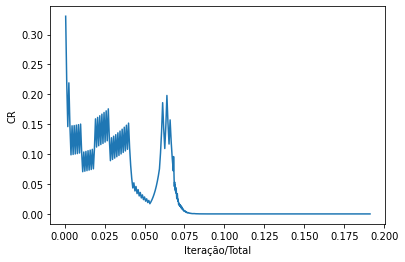

In [76]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

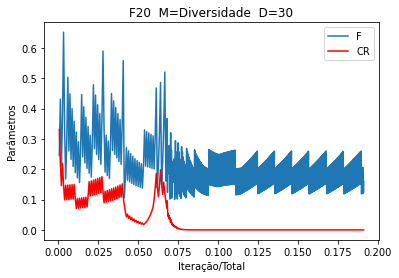

In [77]:

fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()


Text(0.5, 1.0, 'F20_Diversidade_D=30')

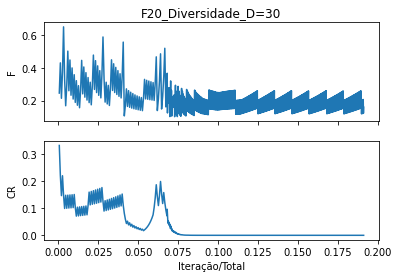

In [78]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)


In [79]:
nome='SUB'+'_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('MCS-FRANNK','Fator F/DE= %.2f' %(fator),'NPAR=',NPAR,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1],'STD __:',STD)
print('MIN __:',MINFO, 'MAX__: ',MAXFO)
print(MEAN[-1])
print(STD)
print(MINFO)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)
# print('melhor=',BEST_AGENTS[BEST_INDEX])

MCS-FRANNK Fator F/DE= 0.25 NPAR= 80 Iterações= 1000 Dim= 30 Min/Max= -100 / 100 _ F20
SUB_Fo-0.5_CRo-0.5_D-30_Interv-1000 

MÉDIA:  8293.99862389472 STD __: 6832.827749675006
MIN __: 187.45831137775116 MAX__:  27746.493213141774
8293.99862389472
6832.827749675006
187.45831137775116
Tempo Médio= 101.587 segundos ---
50 Rodadas

BEST:  [-5.00445939e+01  3.72505436e+01 -2.48142215e+01 -1.17853013e+01
 -5.44338327e+01  5.12013064e+01  1.95997126e+01  3.95360864e+01
  4.80039630e+01 -7.00309988e+01  7.18008307e+01  1.34683443e-01
  4.06104678e+01  3.71023717e+01  5.55639632e+01 -5.41394985e+01
 -7.06176247e+00  1.96040269e+01  6.69612744e+01  6.04920906e+01
  5.76858352e+01  1.14085615e+01  1.30103990e+01  5.71616441e+01
 -7.27251671e+01  6.21143828e+01 -1.13126598e+01 -7.40648548e+01
  3.97147506e+01 -5.16986343e+01  1.87458311e+02]


In [80]:
'''
C-Frannk results....
MCS-FRANNK Fator F/DE= 0.33 NPAR= 100 Iterações= 1000 Dim= 30 Min/Max= -100 / 100 _ F20
SUB_Fo-0.5_CRo-0.5_D-30_Interv-1000 

MÉDIA:  10580.390525409533 STD __: 8031.199318342841
MIN __: 1183.664489600173 MAX__:  43797.784340390885
10580.390525409533
8031.199318342841
1183.664489600173
Tempo Médio= 82.278 segundos ---
50 Rodadas
'''

'\nC-Frannk results....\nMCS-FRANNK Fator F/DE= 0.33 NPAR= 100 Iterações= 1000 Dim= 30 Min/Max= -100 / 100 _ F20\nSUB_Fo-0.5_CRo-0.5_D-30_Interv-1000 \n\nMÉDIA:  10580.390525409533 STD __: 8031.199318342841\nMIN __: 1183.664489600173 MAX__:  43797.784340390885\n10580.390525409533\n8031.199318342841\n1183.664489600173\nTempo Médio= 82.278 segundos ---\n50 Rodadas\n'